In [2]:
MVT = read.csv("mvtWeek1.csv")

In [2]:
summary(MVT)

       ID                      Date       
 Min.   :1310022   5/16/08 0:00  :    11  
 1st Qu.:2832144   10/17/01 22:00:    10  
 Median :4762956   4/13/04 21:00 :    10  
 Mean   :4968629   9/17/05 22:00 :    10  
 3rd Qu.:7201878   10/12/01 22:00:     9  
 Max.   :9181151   10/13/01 22:00:     9  
                   (Other)       :191582  
                     LocationDescription   Arrest         Domestic      
 STREET                        :156564   Mode :logical   Mode :logical  
 PARKING LOT/GARAGE(NON.RESID.): 14852   FALSE:176105    FALSE:191226   
 OTHER                         :  4573   TRUE :15536     TRUE :415      
 ALLEY                         :  2308   NA's :0         NA's :0        
 GAS STATION                   :  2111                                  
 DRIVEWAY - RESIDENTIAL        :  1675                                  
 (Other)                       :  9558                                  
      Beat         District     CommunityArea        Year         Latitu

In [3]:
nrow(MVT)

[1] 191641

In [4]:
names(MVT)

[1] "ID"                  "Date"                "LocationDescription"
 [4] "Arrest"              "Domestic"            "Beat"               
 [7] "District"            "CommunityArea"       "Year"               
[10] "Latitude"            "Longitude"

In [3]:
DateConvert = as.Date(strptime(MVT$Date, "%m/%d/%y %H:%M"))

In [6]:
summary(DateConvert)

        Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2001-01-01" "2003-07-10" "2006-05-21" "2006-08-23" "2009-10-24" "2012-12-31" 

In [8]:
MVT$Month = months(DateConvert)
MVT$Weekday = weekdays(DateConvert)
MVT$Date = DateConvert
table(MVT$Month)


    April    August  December  February   January      July      June     March 
    15280     16572     16426     13511     16047     16801     16002     15758 
      May  November   October September 
    16035     16063     17086     16060 

In [8]:
table(MVT$Weekday)


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
    29284     27397     27118     26316     27319     26791     27416 

In [10]:
table(MVT$Month, MVT$Arrest)

           
            FALSE  TRUE
  April     14028  1252
  August    15243  1329
  December  15029  1397
  February  12273  1238
  January   14612  1435
  July      15477  1324
  June      14772  1230
  March     14460  1298
  May       14848  1187
  November  14807  1256
  October   15744  1342
  September 14812  1248

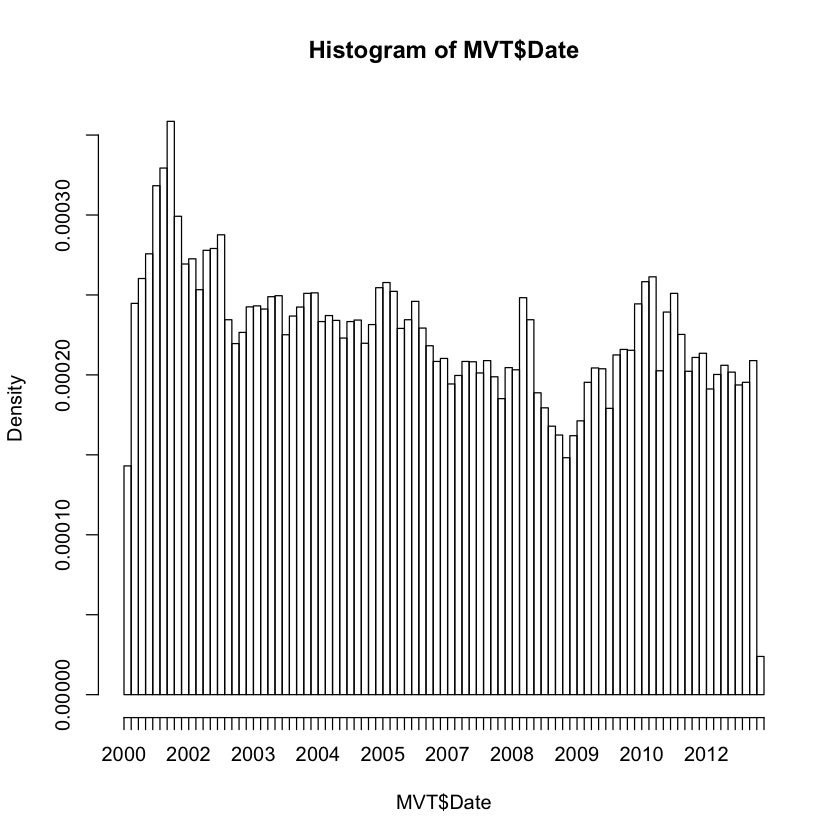

In [11]:
hist(MVT$Date, breaks=100)

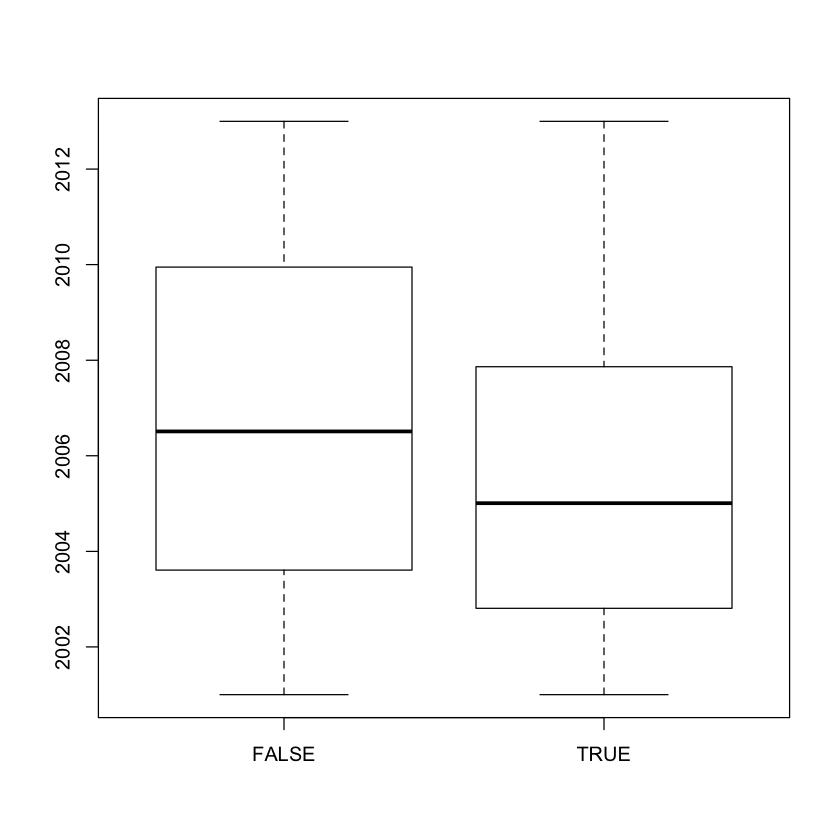

In [5]:
boxplot(MVT$Date ~ MVT$Arrest)

In [10]:
table(MVT$Year, MVT$Arrest)

      
       FALSE  TRUE
  2001 18517  2152
  2002 16638  2115
  2003 14859  1798
  2004 15169  1693
  2005 14956  1528
  2006 14796  1302
  2007 13068  1212
  2008 13425  1020
  2009 11327   840
  2010 14796   701
  2011 15012   625
  2012 13542   550

In [11]:
2152 / (18517 + 2152)

[1] 0.1041173

In [12]:
1212 / (1212 + 13068)

[1] 0.08487395

In [13]:
550 / (550 + 13542)

[1] 0.03902924

In [18]:
table(MVT$LocationDescription)


                             ABANDONED BUILDING 
                                              4 
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA 
                                              4 
    AIRPORT BUILDING NON-TERMINAL - SECURE AREA 
                                              1 
             AIRPORT EXTERIOR - NON-SECURE AREA 
                                             24 
                 AIRPORT EXTERIOR - SECURE AREA 
                                              1 
                            AIRPORT PARKING LOT 
                                             11 
 AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA 
                                              5 
                  AIRPORT VENDING ESTABLISHMENT 
                                             10 
                               AIRPORT/AIRCRAFT 
                                            363 
                                          ALLEY 
                                           2308 
                   

In [20]:
Top5 = subset(MVT, LocationDescription == "STREET" | LocationDescription == "ALLEY" | LocationDescription == "GAS STATION"|LocationDescription == "PARKING LOT/GARAGE(NON.RESID.)"| LocationDescription == "DRIVEWAY - RESIDENTIAL")

In [21]:
summary(Top5)

       ID               Date                                LocationDescription
 Min.   :1310022   Min.   :2001-01-01   STREET                        :156564  
 1st Qu.:2827268   1st Qu.:2003-07-08   PARKING LOT/GARAGE(NON.RESID.): 14852  
 Median :4752514   Median :2006-05-16   ALLEY                         :  2308  
 Mean   :4959006   Mean   :2006-08-18   GAS STATION                   :  2111  
 3rd Qu.:7184899   3rd Qu.:2009-10-15   DRIVEWAY - RESIDENTIAL        :  1675  
 Max.   :9181151   Max.   :2012-12-31   ABANDONED BUILDING            :     0  
                                        (Other)                       :     0  
   Arrest         Domestic            Beat         District     CommunityArea  
 Mode :logical   Mode :logical   Min.   : 111   Min.   : 1.00   Min.   : 0.00  
 FALSE:163492    FALSE:177193    1st Qu.: 722   1st Qu.: 6.00   1st Qu.:22.00  
 TRUE :14018     TRUE :317       Median :1121   Median :10.00   Median :31.00  
 NA's :0         NA's :0         Mean   

In [23]:
nrow(Top5)

[1] 177510

In [24]:
Top5$LocationDescription = factor(Top5$LocationDescription)

In [25]:
str(Top5)

'data.frame':	177510 obs. of  13 variables:
 $ ID                 : int  8951354 8951141 8952223 8951608 8950793 8950760 8951611 8951802 8950706 8951585 ...
 $ Date               : Date, format: "2012-12-31" "2012-12-31" ...
 $ LocationDescription: Factor w/ 5 levels "ALLEY","DRIVEWAY - RESIDENTIAL",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Arrest             : logi  FALSE FALSE FALSE FALSE TRUE FALSE ...
 $ Domestic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Beat               : int  623 1213 724 211 2521 423 231 1021 1215 1011 ...
 $ District           : int  6 12 7 2 25 4 2 10 12 10 ...
 $ CommunityArea      : int  69 24 67 35 19 48 40 29 24 29 ...
 $ Year               : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Latitude           : num  41.8 41.9 41.8 41.8 41.9 ...
 $ Longitude          : num  -87.6 -87.7 -87.7 -87.6 -87.8 ...
 $ Month              : chr  "December" "December" "December" "December" ...
 $ Weekday            : chr  "Monday" "Monday" "Mond

In [27]:
table(Top5$LocationDescription)


                         ALLEY         DRIVEWAY - RESIDENTIAL 
                          2308                           1675 
                   GAS STATION PARKING LOT/GARAGE(NON.RESID.) 
                          2111                          14852 
                        STREET 
                        156564 

In [28]:
table(Top5$LocationDescription, Top5$Arrest)

                                
                                  FALSE   TRUE
  ALLEY                            2059    249
  DRIVEWAY - RESIDENTIAL           1543    132
  GAS STATION                      1672    439
  PARKING LOT/GARAGE(NON.RESID.)  13249   1603
  STREET                         144969  11595

In [30]:
table(Top5$LocationDescription, Top5$Weekday)

                                
                                 Friday Monday Saturday Sunday Thursday Tuesday
  ALLEY                             385    320      341    307      315     323
  DRIVEWAY - RESIDENTIAL            257    255      202    221      263     243
  GAS STATION                       332    280      338    336      282     270
  PARKING LOT/GARAGE(NON.RESID.)   2331   2128     2199   1936     2082    2073
  STREET                          23773  22305    22175  21756    22296   21888
                                
                                 Wednesday
  ALLEY                                317
  DRIVEWAY - RESIDENTIAL               234
  GAS STATION                          273
  PARKING LOT/GARAGE(NON.RESID.)      2103
  STREET                             22371